In [59]:
from os import getcwd, path, listdir
cwd = getcwd()
data_news_dir = path.join(cwd, '../data/prepared')
news_files = list(map(lambda entry: path.join(data_news_dir, entry),listdir(data_news_dir)))


In [60]:
import pandas as pd
df = pd.read_json(news_files[0])
df.shape

(63147, 5)

In [61]:
df = df[df['entities.organizations'].apply(lambda val: len(val) > 0)]
df.head()

,thread.site_full,title,entities.organizations,text,published
1,www.reuters.com,Russia's National Wealth Fund at $63.91 bln as...,"[{'name': 'reuters', 'sentiment': 'negative'},...","MOSCOW, May 4 (Reuters) - Russia’s National We...",2018-05-04T23:03:00.000+03:00
2,www.reuters.com,Swedish apartment prices fell 7 pct Feb-April ...,"[{'name': 'reuters', 'sentiment': 'negative'},...","STOCKHOLM, May 16(Reuters) - Swedish apartment...",2018-05-16T12:02:00.000+03:00
3,www.cnbc.com,Onxeo Provides Business Update and Reports Fir...,"[{'name': 'company', 'sentiment': 'none'}, {'n...","Development of lead product candidate, AsiDNA™...",2018-05-16T20:00:00.000+03:00
4,www.reuters.com,CPT Technology Group's April Consolidated Reve...,"[{'name': 'reuters', 'sentiment': 'negative'},...",May 7 (Reuters) - CPT Technology Group Co Ltd:...,2018-05-07T18:04:00.000+03:00
5,www.reuters.com,Images of April,"[{'name': 'reuters', 'sentiment': 'negative'}]",Images of April 8:51am EDT - 01:38\nImages tak...,2018-05-01T15:51:00.000+03:00


In [62]:
df['entities_blacklist'] = df['thread.site_full'].apply(lambda entry: entry.split('.')[-2])
df.head()

,thread.site_full,title,entities.organizations,text,published,entities_blacklist
1,www.reuters.com,Russia's National Wealth Fund at $63.91 bln as...,"[{'name': 'reuters', 'sentiment': 'negative'},...","MOSCOW, May 4 (Reuters) - Russia’s National We...",2018-05-04T23:03:00.000+03:00,reuters
2,www.reuters.com,Swedish apartment prices fell 7 pct Feb-April ...,"[{'name': 'reuters', 'sentiment': 'negative'},...","STOCKHOLM, May 16(Reuters) - Swedish apartment...",2018-05-16T12:02:00.000+03:00,reuters
3,www.cnbc.com,Onxeo Provides Business Update and Reports Fir...,"[{'name': 'company', 'sentiment': 'none'}, {'n...","Development of lead product candidate, AsiDNA™...",2018-05-16T20:00:00.000+03:00,cnbc
4,www.reuters.com,CPT Technology Group's April Consolidated Reve...,"[{'name': 'reuters', 'sentiment': 'negative'},...",May 7 (Reuters) - CPT Technology Group Co Ltd:...,2018-05-07T18:04:00.000+03:00,reuters
5,www.reuters.com,Images of April,"[{'name': 'reuters', 'sentiment': 'negative'}]",Images of April 8:51am EDT - 01:38\nImages tak...,2018-05-01T15:51:00.000+03:00,reuters


In [63]:
def remove_published(row):
    row.loc['entities.organizations'] = list(filter(lambda d: d['name'].strip() != row.loc['entities_blacklist'], row.loc['entities.organizations']))
    return row
df = df.apply(remove_published, axis=1)

In [64]:
df.head()

,thread.site_full,title,entities.organizations,text,published,entities_blacklist
1,www.reuters.com,Russia's National Wealth Fund at $63.91 bln as...,"[{'name': 'national wealth fund', 'sentiment':...","MOSCOW, May 4 (Reuters) - Russia’s National We...",2018-05-04T23:03:00.000+03:00,reuters
2,www.reuters.com,Swedish apartment prices fell 7 pct Feb-April ...,"[{'name': 'statistics sweden', 'sentiment': 'n...","STOCKHOLM, May 16(Reuters) - Swedish apartment...",2018-05-16T12:02:00.000+03:00,reuters
3,www.cnbc.com,Onxeo Provides Business Update and Reports Fir...,"[{'name': 'company', 'sentiment': 'none'}, {'n...","Development of lead product candidate, AsiDNA™...",2018-05-16T20:00:00.000+03:00,cnbc
4,www.reuters.com,CPT Technology Group's April Consolidated Reve...,"[{'name': 'cpt technology group', 'sentiment':...",May 7 (Reuters) - CPT Technology Group Co Ltd:...,2018-05-07T18:04:00.000+03:00,reuters
5,www.reuters.com,Images of April,[],Images of April 8:51am EDT - 01:38\nImages tak...,2018-05-01T15:51:00.000+03:00,reuters


In [65]:
df = df[df['entities.organizations'].apply(lambda val: len(val) > 0)]

In [66]:
df = df.drop(columns=['thread.site_full', 'entities_blacklist'])
df.head()

,title,entities.organizations,text,published
1,Russia's National Wealth Fund at $63.91 bln as...,"[{'name': 'national wealth fund', 'sentiment':...","MOSCOW, May 4 (Reuters) - Russia’s National We...",2018-05-04T23:03:00.000+03:00
2,Swedish apartment prices fell 7 pct Feb-April ...,"[{'name': 'statistics sweden', 'sentiment': 'n...","STOCKHOLM, May 16(Reuters) - Swedish apartment...",2018-05-16T12:02:00.000+03:00
3,Onxeo Provides Business Update and Reports Fir...,"[{'name': 'company', 'sentiment': 'none'}, {'n...","Development of lead product candidate, AsiDNA™...",2018-05-16T20:00:00.000+03:00
4,CPT Technology Group's April Consolidated Reve...,"[{'name': 'cpt technology group', 'sentiment':...",May 7 (Reuters) - CPT Technology Group Co Ltd:...,2018-05-07T18:04:00.000+03:00
6,Spanish stocks - Factors to watch on Tuesday,"[{'name': 'vidrala vidrala', 'sentiment': 'non...",The following Spanish stocks may be affected b...,2018-05-29T13:59:00.000+03:00


In [67]:
mentioned_entities = df['entities.organizations'].apply(lambda arr: len(arr)).value_counts()
mentioned_entities

2     13041
3     12449
1     10099
4      8721
5      5171
6      2980
7      1724
8       941
9       531
10      269
11      169
12      104
13       47
14       42
16       14
15       12
17        8
28        2
18        2
21        2
22        2
24        2
25        2
40        1
27        1
46        1
36        1
35        1
33        1
32        1
Name: entities.organizations, dtype: int64

In [72]:
df['mentioned_entities'] = df['entities.organizations'].apply(lambda arr: len(arr))

In [73]:
namedropping = df[df['mentioned_entities'] > 10]
namedropping.to_json(path.join(cwd,'../data/news/namedropping.json'))

In [74]:
namedropping[namedropping['mentioned_entities'] == 13]

,title,entities.organizations,text,published,mentioned_entities
4129,Suzanne Scott to head Fox News,"[{'name': 'fox news reuters staff', 'sentiment...",May 17 (Reuters) - Suzanne Scott has been name...,2018-05-17T18:53:00.000+03:00,13
4463,Super Rugby summaries,"[{'name': 'super rugby', 'sentiment': 'negativ...","May 11, 2018 / 10:22 AM / Updated 4 hours ago ...",2018-05-11T13:21:00.000+03:00,13
4510,DocuSign Announces Closing of Initial Public O...,"[{'name': 'inc.', 'sentiment': 'negative'}, {'...","SAN FRANCISCO, May 2, 2018 /PRNewswire/ -- Doc...",2018-05-02T17:11:00.000+03:00,13
4850,Adaptive Insights Files Registration Statement...,"[{'name': 'adaptive insights, inc.', 'sentimen...","PALO ALTO, Calif., May 17, 2018 /PRNewswire/ -...",2018-05-17T20:03:00.000+03:00,13
5409,"Mani Foroohar, M.D. Joins Leerink Partners Equ...",[{'name': 'leerink partners equity research te...,"BOSTON--(BUSINESS WIRE)-- Leerink Partners, a ...",2018-05-17T17:00:00.000+03:00,13
5759,"CANADA STOCKS - TSX rises 0.08 pct, extends wi...","[{'name': 'tsx', 'sentiment': 'negative'}, {'n...","May 15, 2018 / 8:25 PM / Updated 12 minutes ag...",2018-05-15T23:24:00.000+03:00,13
6967,Invesco Closed-End Funds Declare Dividends,"[{'name': 'the board of trustees', 'sentiment'...","ATLANTA, May 1, 2018 /PRNewswire/ -- The Board...",2018-05-01T20:05:00.000+03:00,13
10125,Harish Manwani Joins Gilead Sciences’ Board of...,"[{'name': 'gilead sciences, inc.', 'sentiment'...","FOSTER CITY, Calif.--(BUSINESS WIRE)-- Gilead ...",2018-05-10T00:30:00.000+03:00,13
10576,This Morning's Technical Outlook on Medical Eq...,"[{'name': 'hologic', 'sentiment': 'negative'},...","NEW YORK, May 4, 2018 /PRNewswire/ --\nIf you ...",2018-05-04T14:10:00.000+03:00,13
11017,"CANADA STOCKS - TSX rises, oil up at $67.66 a ...","[{'name': 'tsx', 'sentiment': 'negative'}, {'n...",May 2 (Reuters) - * The Toronto Stock Exchange...,2018-05-03T04:26:00.000+03:00,13


In [75]:
namedropping.loc[45107].text

'May 31, 2018 / 3:37 PM / Updated 5 hours ago Orange aiming to merge video arm with Altice Studio - Le Figaro Reuters Staff 1 Min Read\nPARIS (Reuters) - Orange, France’s biggest telecoms operator, is looking to merge its Orange Cinema Series (OCS) arm with Altice Studio to create a new business big enough to challenge the likes of Netflix, Le Figaro newspaper reported. The logo of French telecom operator Orange is pictured during the Viva Tech start-up and technology summit in Paris, France, May 25, 2018. REUTERS/Charles Platiau\nLe Figaro said on its website the deal would see Orange and SFR - which is owned by Altice - link up their OCS and Altice Studio video services, allowing Orange to access U.S. content signed up by Altice Studio.\nOrange’s OCS has an exclusive contract with HBO, while Altice has exclusive distribution deals with Discovery Communications and NBC Universal.\nLe Figaro added in its unsourced report that a merger between OCS and Altice Studio could represent a set

In [76]:
namedropping.loc[45107]['entities.organizations']

[{'name': 'orange', 'sentiment': 'negative'},
 {'name': 'altice studio - le figaro', 'sentiment': 'negative'},
 {'name': 'netflix', 'sentiment': 'none'},
 {'name': 'nbc universal', 'sentiment': 'none'},
 {'name': 'platiau le figaro', 'sentiment': 'none'},
 {'name': 'altice studio', 'sentiment': 'none'},
 {'name': 'orange’s ocs', 'sentiment': 'none'},
 {'name': 'hbo', 'sentiment': 'none'},
 {'name': 'discovery communications', 'sentiment': 'none'},
 {'name': 'vivendi’s canal plus tv', 'sentiment': 'none'},
 {'name': 'le figaro reuters staff', 'sentiment': 'none'},
 {'name': 'le figaro', 'sentiment': 'none'},
 {'name': 'ocs', 'sentiment': 'none'}]

In [77]:
df[df['mentioned_entities'] > 7].shape[0] / df.shape[0]

0.03826698141673027

In [78]:
df = df[df['mentioned_entities'] <= 7]

In [79]:
df.shape

(54185, 5)

In [80]:
df.head()

,title,entities.organizations,text,published,mentioned_entities
1,Russia's National Wealth Fund at $63.91 bln as...,"[{'name': 'national wealth fund', 'sentiment':...","MOSCOW, May 4 (Reuters) - Russia’s National We...",2018-05-04T23:03:00.000+03:00,2
2,Swedish apartment prices fell 7 pct Feb-April ...,"[{'name': 'statistics sweden', 'sentiment': 'n...","STOCKHOLM, May 16(Reuters) - Swedish apartment...",2018-05-16T12:02:00.000+03:00,2
3,Onxeo Provides Business Update and Reports Fir...,"[{'name': 'company', 'sentiment': 'none'}, {'n...","Development of lead product candidate, AsiDNA™...",2018-05-16T20:00:00.000+03:00,2
4,CPT Technology Group's April Consolidated Reve...,"[{'name': 'cpt technology group', 'sentiment':...",May 7 (Reuters) - CPT Technology Group Co Ltd:...,2018-05-07T18:04:00.000+03:00,2
7,BRIEF-Nexeon Medsystems Q1 Revenue $2.87 Million,"[{'name': 'nexeon medsystems inc', 'sentiment'...",May 21 (Reuters) - Nexeon Medsystems Inc:\n* N...,2018-05-22T05:03:00.000+03:00,2


In [82]:
df['entities.organizations'].iloc[1]

[{'name': 'statistics sweden', 'sentiment': 'none'},
 {'name': 'svensk maklarstatistik association', 'sentiment': 'none'}]

In [104]:
import numpy as np
entities = df['entities.organizations'].apply(lambda x: list(map(lambda entry: entry['name'], x)))
entities

1                 [national wealth fund, finance ministry]
2        [statistics sweden, svensk maklarstatistik ass...
3                                    [company, onxeo s.a.]
4        [cpt technology group, cpt technology group co...
7                           [nexeon medsystems inc, eikon]
                               ...                        
63140    [resolute energy corporation, nyse, about reso...
63141    [monsanto, bayer, bayer ag, cci, competition c...
63142    [sumtra diversified inc., sumtra diversified i...
63145           [international atomic energy agency, u.n.]
63146    [gaming innovation group, eikon, gdynia newsroom]
Name: entities.organizations, Length: 54185, dtype: object

In [110]:
sample_kb = pd.Series(list(set([ x for entry in entities for x in entry ])))

In [113]:
sample_kb

0                                        reed
1        kasa corporation (australia) pty ltd
2                                       chegg
3                         national amusements
4                                hormel foods
                         ...                 
51816             cars.com taps seasoned tech
51817                        tampa bay lightn
51818                               frontline
51819                concur technologies inc.
51820                           wh group ltd.
Length: 51821, dtype: object

In [131]:
stocks_path = path.join(cwd, '../data/stock-data')
nasdaq_symbols_f = path.join(stocks_path,'NASDAQ.txt')
nyse_symbols_f = path.join(stocks_path,'NYSE.txt')
def load_stock_symbols():
    nasdaq_symbols = []
    nyse_symbols = []
    with open(nasdaq_symbols_f) as f:
        nasdaq_symbols = [ tuple(line.strip().split('\t')) for line in f.readlines() ]
    with open(nyse_symbols_f) as f:
        nyse_symbols = [ tuple(line.strip().split('\t')) for line in f.readlines() ]
    return nasdaq_symbols[1:], nyse_symbols[1:]
load_stock_symbols()

([('AABA', 'Altaba Inc'),
  ('AAL', 'American Airlines Gp'),
  ('AAME', 'Atlantic Amer Cp'),
  ('AAOI', 'Applied Optoelect'),
  ('AAON', 'Aaon Inc'),
  ('AAPL', 'Apple Inc'),
  ('AAWW', 'Atlas Air Ww'),
  ('AAXJ', 'All Country Asia Ex Japan Ishares MSCI ETF'),
  ('AAXN', 'Axon Inc'),
  ('ABAC', 'Aoxin Tianli Grp'),
  ('ABCB', 'Ameris Bancorp'),
  ('ABCD', 'Cambium Learning Grp'),
  ('ABDC', 'Alcentra Capital Com'),
  ('ABEO', 'Abeona Therapeutics'),
  ('ABEOW', 'Abeona Thera Wts'),
  ('ABIL', 'Ability Inc'),
  ('ABIO', 'Arca Biopharma Inc'),
  ('ABMD', 'Abiomed Inc'),
  ('ABTX', 'Allegiance Banc CS'),
  ('ABUS', 'Arbutus Biopharma Cp'),
  ('ACAD', 'Acadia Pharmaceutica'),
  ('ACBI', 'Atlantic Capital'),
  ('ACER', 'Acer Therapeutics Inc'),
  ('ACET', 'Aceto Cp'),
  ('ACGL', 'Arch Capital Grp Ltd'),
  ('ACGLO', 'Arch Capital Group Ltd ADR'),
  ('ACGLP', 'Arch Capital Group Ltd'),
  ('ACHC', 'Acadia Healthcr Co'),
  ('ACHN', 'Achillion Pharmaceut'),
  ('ACHV', 'Achieve Life Sciences Inc'

In [132]:
nasdaq, nyse = load_stock_symbols()
def convert_list_of_tuples_to_series(list_of_tuples):
    return pd.DataFrame(list_of_tuples).set_index(0)[1]
nasdaq_s = convert_list_of_tuples_to_series(nasdaq)
nyse_s = convert_list_of_tuples_to_series(nyse)

In [133]:
nyse_s.shape, nasdaq_s.shape

((3170,), (3409,))

In [148]:
excluded_symbols_f = path.join(stocks_path, 'excluded_symbols.txt')
excluded_symbols = []
with open(excluded_symbols_f) as f:
    excluded_symbols = list(map(lambda row: row.split(' ')[1], f.readlines()))
excluded_nasdaq = [ symbol for symbol in excluded_symbols if symbol in nasdaq_s.index ]
non_existing_nasdaq = [ symbol for symbol in nasdaq_s.index if not path.isfile(path.join(stocks_path, f'full_history/{symbol}.csv')) ]
nasdaq_s[excluded_nasdaq]

0
ONSIW                                 Oncobiologics Inc
DOTAW    Draper Oakwood Technology Acquisition Inc Warr
HLIT                                       Harmonic Inc
BGCP                                  Bgc Partners Cl A
CRUSC             Calvert Ultra-Short Income Nextshares
                              ...                      
VEACW               Vantage Energy Acquisition Corp Wt.
SNOAW                        Sonoma Pharmaceuticals Inc
OPGNW                                 Opgen Inc Warrant
TACOW                                 Del Taco Rest Wts
IMRNW                          Immuron Limited Warrants
Name: 1, Length: 139, dtype: object

In [149]:
set(excluded_nasdaq) - set(non_existing_nasdaq)

{'ABEOW',
 'ADIL',
 'ADILW',
 'ADXSW',
 'AGFSW',
 'AHPAW',
 'AKTX',
 'AMBCW',
 'AMRHW',
 'AMRWW',
 'APDNW',
 'ATISW',
 'BCACW',
 'BGCP',
 'BHACW',
 'BLNKW',
 'BNTCW',
 'BPFHW',
 'BRACW',
 'BRPAW',
 'BTEC',
 'BVXVW',
 'CERCW',
 'CETXW',
 'CHEKW',
 'CHEKZ',
 'CLIRW',
 'CLRBW',
 'CLRBZ',
 'CMSSW',
 'CNACW',
 'CRUSC',
 'CTXRW',
 'CYRXW',
 'CYTXW',
 'CYTXZ',
 'DAX',
 'DFBHW',
 'DLPNW',
 'DOTAW',
 'DRIOW',
 'DSKEW',
 'EACQW',
 'EAGLW',
 'EMITF',
 'ENTXW',
 'ESTRW',
 'EYEGW',
 'EYESW',
 'FFBCW',
 'FSACW',
 'GLACW',
 'GPAQW',
 'GSHTW',
 'GTYHW',
 'HBANN',
 'HCCHW',
 'HJLIW',
 'HLIT',
 'HTLD',
 'HUNTW',
 'HYACW',
 'IAMXW',
 'IEAWW',
 'IMRNW',
 'IMXIW',
 'INDUW',
 'IVFVC',
 'JASNW',
 'JSML',
 'JSYNW',
 'KAACW',
 'KBLMW',
 'KHC',
 'KTOVW',
 'LACQU',
 'LACQW',
 'LCAHW',
 'LFACW',
 'LINDW',
 'LMFAW',
 'MBRX',
 'MDGSW',
 'MMDMW',
 'MNGA',
 'MOGLC',
 'MPACW',
 'MTECW',
 'MTFBW',
 'MUDSW',
 'MYNDW',
 'NDRAW',
 'NEBUW',
 'NESRW',
 'NHLDW',
 'NUROW',
 'NXEOW',
 'NXTDW',
 'OKDCC',
 'ONSIW',
 'ONTXW',
 'O

In [150]:
set(non_existing_nasdaq) - set(excluded_nasdaq)

{'ALGRW',
 'APOPW',
 'BNGOW',
 'BVNSC',
 'EDTXW',
 'EVFTC',
 'FLMNW',
 'FMCIW',
 'FPAYW',
 'LOACW',
 'SBNYW',
 'TKKSW',
 'TOTAW',
 'TZACW',
 'VLYWW',
 'VRRMW'}

In [151]:
excluded_nyse = [ symbol for symbol in excluded_symbols if symbol in nyse_s.index ]
non_existing_nyse = [ symbol for symbol in nyse_s.index if not path.isfile(path.join(stocks_path, f'full_history/{symbol}.csv')) ]
set(excluded_nyse) - set(non_existing_nyse)

{'AMRX',
 'BEN',
 'BV',
 'CYD',
 'EXTN',
 'PAA',
 'PBF',
 'SPB',
 'TCI',
 'TNET',
 'VJET'}

In [153]:
set(non_existing_nyse) - set(excluded_nyse)

{'ABR-A',
 'ABR-B',
 'ABR-C',
 'AFS-A',
 'AFS-B',
 'AFS-C',
 'AFS-D',
 'AFS-E',
 'AFS-F',
 'AGM-A',
 'AGM-B',
 'AGM-C',
 'AGO-B',
 'AGO-E',
 'AGO-F',
 'AHL-C',
 'AHL-D',
 'AHT-D',
 'AHT-F',
 'AHT-G',
 'AHT-H',
 'AHT-I',
 'AI-B',
 'AIV-A',
 'ALL-A',
 'ALL-B',
 'ALL-C',
 'ALL-D',
 'ALL-E',
 'ALL-F',
 'ALL-G',
 'ALL-Y',
 'ALP-Q',
 'AMH-D',
 'AMH-E',
 'AMH-F',
 'AMH-G',
 'AMH-H',
 'ANH-A',
 'ANH-B',
 'ANH-C',
 'APO-A',
 'APO-B',
 'ARE-A',
 'ARE-D',
 'ARI-C',
 'ARR-A',
 'ARR-B',
 'ASB-C',
 'ASB-D',
 'ASB-E',
 'AXS-D',
 'AXS-E',
 'BAC-A',
 'BAC-B',
 'BAC-C',
 'BAC-E',
 'BAC-K',
 'BAC-L',
 'BAC-W',
 'BAC-Y',
 'BAN-D',
 'BAN-E',
 'BBT-D',
 'BBT-E',
 'BBT-F',
 'BBT-G',
 'BBT-H',
 'BC-A',
 'BCS-D',
 'BDC-B',
 'BFS-C',
 'BFS-D',
 'BHR-B',
 'BK-C',
 'BML-G',
 'BML-H',
 'BML-J',
 'BML-L',
 'BXP-B',
 'C-C',
 'C-J',
 'C-K',
 'C-L',
 'C-N',
 'C-S',
 'CAI-A',
 'CAI-B',
 'CBB-B',
 'CBL-D',
 'CBL-E',
 'CCC.U',
 'CCH.U',
 'CCI-A',
 'CDR-B',
 'CDR-C',
 'CFR-A',
 'CHK-D',
 'CHM-A',
 'CIM-A',
 'CIM-B',
 'CIM

In [158]:
drop_nasdaq = [
    symbol
    for symbol in nasdaq_s.index
    if symbol in excluded_symbols 
    or (not path.isfile(path.join(stocks_path, f'full_history/{symbol}.csv')))
]
drop_nyse = [
    symbol
    for symbol in nyse_s.index
    if symbol in excluded_symbols 
    or (not path.isfile(path.join(stocks_path, f'full_history/{symbol}.csv')))
]
len(drop_nasdaq) / nasdaq_s.shape[0], len(drop_nyse) / nyse_s.shape[0]

(0.04546787914344382, 0.1722397476340694)

In [159]:
nasdaq_s = nasdaq_s.drop(labels=drop_nasdaq)
nyse_s = nyse_s.drop(labels=drop_nyse)


In [161]:
nasdaq_s = nasdaq_s.str.lower()
nyse_s = nyse_s.str.lower()

In [162]:
nasdaq_s

0
AABA              altaba inc
AAL     american airlines gp
AAME        atlantic amer cp
AAOI       applied optoelect
AAON                aaon inc
                ...         
ZNGA          zynga inc cl a
ZS               zscaler inc
ZSAN           zosano pharma
ZUMZ              zumiez inc
ZYNE       zynerba pharma cs
Name: 1, Length: 3254, dtype: object

In [164]:
# Attempt 1: Match by levenshtein distance
import jellyfish
#sample_kb.str.lower()
df = pd.DataFrame(sample_kb.str.lower())
df.head()

,0
0,reed
1,kasa corporation (australia) pty ltd
2,chegg
3,national amusements
4,hormel foods


<AxesSubplot:>

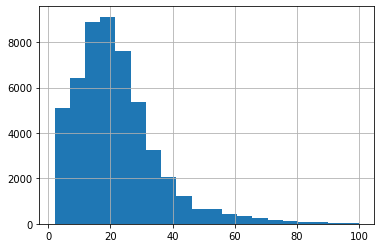

In [173]:
sample_kb.apply(lambda x: len(x)).hist(bins=20)

<AxesSubplot:>

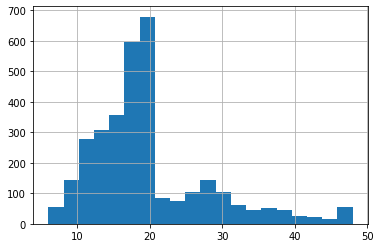

In [174]:
nasdaq_s.apply(lambda x: len(x)).hist(bins=20)

In [199]:
def calculate_normalized_levenshtein(x,y):
    dist = jellyfish.levenshtein_distance(x,y)
    len_x = len(x)
    len_y = len(y)
    len_diff = max(len_x - len_y, len_y - len_x)
    max_len = max(len_x, len_y)
    return (dist - len_diff) / (max_len - len_diff)

def process_value(stock_symbol, name):
    distances = df['entity'].apply(
        lambda entity: [ val for val in series if calculate_normalized_levenshtein(entity, val) < threshold ]
    )
    column_name = f'{name}_threshold_{threshold}'
    count_column_name = f'{column_name}_count'
    df[column_name] = distances.values
    df[count_column_name] = distances.shape[0]

#for index in nyse_s.index:
df['sample_distance'] = df['entity'].apply(lambda val: calculate_normalized_levenshtein(val, nyse_s.iloc[0]))

In [200]:
df

,entity,sample_distance
0,reed,0.500000
1,kasa corporation (australia) pty ltd,0.800000
2,chegg,0.400000
3,national amusements,0.842105
4,hormel foods,0.583333
...,...,...
51816,cars.com taps seasoned tech,0.750000
51817,tampa bay lightn,0.812500
51818,frontline,0.555556
51819,concur technologies inc.,0.400000


In [201]:
nyse_s.iloc[0]

'agilent technologies'

In [203]:
df[df['sample_distance'] < 0.05]

,entity,sample_distance
459,ecog,0.0
603,e co,0.0
803,leeco,0.0
957,aig,0.0
1493,co,0.0
...,...,...
49450,ael,0.0
49719,acn,0.0
50021,ttc,0.0
50030,aci,0.0


In [205]:
df = df.drop(columns=['sample_distance'])

In [207]:
nyse_s.shape[0]

2624

In [209]:
entities = df['entity']
entities[entities.apply(lambda entity: entity in nyse_s.values)]
# Direct matches were only 900 in nyse

27                   chaparral energy inc
137                         zymeworks inc
156                azure power global ltd
219          adtalem global education inc
300                 stifel financial corp
                       ...               
51509                  motorola solutions
51529                        energen corp
51565                        iamgold corp
51608    algonquin power & utilities corp
51741                             keycorp
Name: entity, Length: 956, dtype: object

In [217]:
import nltk
df['ngrams'] = df['entity'].apply(lambda entity: set(nltk.ngrams(entity, n=3)))
nyse_df = pd.DataFrame(nyse_s)


In [221]:
nyse_df = nyse_df.rename(columns={1: 'entity'})
nyse_df['ngrams'] = nyse_df['entity'].apply(lambda entity: set(nltk.ngrams(entity, n=3)))
nasdaq_df = pd.DataFrame(nasdaq_s)
nasdaq_df = nasdaq_df.rename(columns={1: 'entity'})
nasdaq_df['ngrams'] = nasdaq_df['entity'].apply(lambda entity: set(nltk.ngrams(entity, n=3)))

In [225]:
nyse_df = nyse_df.reset_index()
nasdaq_df = nasdaq_df.reset_index()

In [227]:
nyse_df = nyse_df.rename(columns={0: 'stock_symbol'})
nasdaq_df = nasdaq_df.rename(columns={0: 'stock_symbol'})

In [229]:
nasdaq_df

,stock_symbol,entity,ngrams
0,AABA,altaba inc,"{(t, a, b), ( , i, n), (a, l, t), (l, t, a), (..."
1,AAL,american airlines gp,"{(c, a, n), ( , a, i), (r, l, i), (l, i, n), (..."
2,AAME,atlantic amer cp,"{(n, t, i), (l, a, n), (i, c, ), (a, m, e), (..."
3,AAOI,applied optoelect,"{(p, t, o), (a, p, p), (o, e, l), (d, , o), (..."
4,AAON,aaon inc,"{(a, a, o), (o, n, ), ( , i, n), (n, , i), (..."
...,...,...,...
3249,ZNGA,zynga inc cl a,"{(n, c, ), (l, , a), (y, n, g), (g, a, ), (..."
3250,ZS,zscaler inc,"{( , i, n), (l, e, r), (e, r, ), (z, s, c), (..."
3251,ZSAN,zosano pharma,"{(n, o, ), (z, o, s), (o, , p), (a, n, o), (..."
3252,ZUMZ,zumiez inc,"{( , i, n), (u, m, i), (z, , i), (i, n, c), (..."


In [236]:
sample_record = df.loc[51817]
sample_record

entity                                     tampa bay lightn
ngrams    {(t, a, m), ( , l, i), (y,  , l), (h, t, n), (...
Name: 51817, dtype: object

In [241]:
nyse_df['sample_results'] = nyse_df['ngrams'].apply(lambda ngrams: nltk.jaccard_distance(ngrams, sample_record['ngrams']))
nyse_df[nyse_df['sample_results'] < 0.9]

,stock_symbol,entity,ngrams,sample_results
578,CSLT,castlight health inc,"{(t, , h), ( , h, e), (g, h, t), (h, e, a), (...",0.896552
911,FELP,foresight energy lp,"{(r, g, y), (n, e, r), (i, g, h), (y, , l), (...",0.892857
1844,PAM,pampa energia s.a.,"{(n, e, r), (r, g, i), ( , s, .), (e, r, g), (...",0.888889


In [315]:
nyse_df['sample_results_2'] = nyse_df['ngrams'].apply(
    lambda ngrams: nltk.jaccard_distance(ngrams, set(nltk.ngrams(nyse_df['entity'].sample().values[0], n=3)))
)
processed = 0
nyse_df[nyse_df['sample_results_2'] < 0.3]

,stock_symbol,entity,ngrams,sample_results,sample_results_2,temp_results


In [332]:
def call_counter(func):
    def helper(*args, **kwargs):
        helper.calls += 1
        if helper.calls % 1000 == 0:
            print(f'calls: {helper.calls}')
        return func(*args, **kwargs)
    helper.calls = 0
    helper.__name__= func.__name__

    return helper
@call_counter
def calculate_results_for_ngram(input_ngrams, stock_market_df, threshold):
    stock_market_df['temp_results'] = stock_market_df['ngrams'].apply(
        lambda ngrams: nltk.jaccard_distance(ngrams, input_ngrams)
    )
    result = stock_market_df[stock_market_df['temp_results'] < threshold]
    return result['stock_symbol'].tolist()

def calculate_ngrams(name, stock_market_df):
    result_col_name = f'ngram_{name}_results'
    df[result_col_name] = df['ngrams'].apply(lambda ngram: calculate_results_for_ngram(ngram, stock_market_df, 0.3))



In [333]:
df[df['entity'].apply(lambda entity: entity in nasdaq_df['entity'])]

,entity,ngrams


In [334]:
# Reaaly long call takes couple of minutes
calculate_ngrams('nyse',nyse_df)

calls: 1000
calls: 2000
calls: 3000
calls: 4000
calls: 5000
calls: 6000
calls: 7000
calls: 8000
calls: 9000
calls: 10000
calls: 11000
calls: 12000
calls: 13000
calls: 14000
calls: 15000
calls: 16000
calls: 17000
calls: 18000
calls: 19000
calls: 20000
calls: 21000
calls: 22000
calls: 23000
calls: 24000
calls: 25000
calls: 26000
calls: 27000
calls: 28000
calls: 29000
calls: 30000
calls: 31000
calls: 32000
calls: 33000
calls: 34000
calls: 35000
calls: 36000
calls: 37000
calls: 38000
calls: 39000
calls: 40000
calls: 41000
calls: 42000
calls: 43000
calls: 44000
calls: 45000
calls: 46000
calls: 47000
calls: 48000
calls: 49000
calls: 50000
calls: 51000


In [335]:
df

,entity,ngrams,ngram_nyse_results
0,reed,"{(e, e, d), (r, e, e)}",[]
1,kasa corporation (australia) pty ltd,"{(a, ), ), (y, , l), (o, n, ), (s, a, ), (...",[]
2,chegg,"{(c, h, e), (e, g, g), (h, e, g)}",[]
3,national amusements,"{(l, , a), (i, o, n), (n, a, l), (e, m, e), (...",[]
4,hormel foods,"{(o, o, d), (e, l, ), (o, d, s), (m, e, l), (...",[]
...,...,...,...
51816,cars.com taps seasoned tech,"{(s, , s), (s, o, n), ( , t, a), (s, ., c), (...",[]
51817,tampa bay lightn,"{(t, a, m), ( , l, i), (y, , l), (h, t, n), (...",[]
51818,frontline,"{(l, i, n), (i, n, e), (o, n, t), (f, r, o), (...",[]
51819,concur technologies inc.,"{(u, r, ), (n, c, .), (n, o, l), (g, i, e), (...",[]


In [337]:
df['ngram_nyse_results'].apply(lambda res: len(res)).value_counts()

0     49052
1      2647
2        80
3        32
5         3
4         3
10        2
7         2
Name: ngram_nyse_results, dtype: int64

In [338]:
calculate_ngrams('nasdaq',nasdaq_df)

calls: 52000
calls: 53000
calls: 54000
calls: 55000
calls: 56000
calls: 57000
calls: 58000
calls: 59000
calls: 60000
calls: 61000
calls: 62000
calls: 63000
calls: 64000
calls: 65000
calls: 66000
calls: 67000
calls: 68000
calls: 69000
calls: 70000
calls: 71000
calls: 72000
calls: 73000
calls: 74000
calls: 75000
calls: 76000
calls: 77000
calls: 78000
calls: 79000
calls: 80000
calls: 81000
calls: 82000
calls: 83000
calls: 84000
calls: 85000
calls: 86000
calls: 87000
calls: 88000
calls: 89000
calls: 90000
calls: 91000
calls: 92000
calls: 93000
calls: 94000
calls: 95000
calls: 96000
calls: 97000
calls: 98000
calls: 99000
calls: 100000
calls: 101000
calls: 102000
calls: 103000


In [340]:
df['ngram_nasdaq_results'].apply(lambda res: len(res)).value_counts()

0     49531
1      2135
2        96
4        23
3        20
5         7
6         3
11        2
12        1
10        1
8         1
7         1
Name: ngram_nasdaq_results, dtype: int64

In [345]:
df = df[df.apply(lambda row: len(row['ngram_nasdaq_results']) > 0 or len(row['ngram_nyse_results']) > 0,axis =1)]

In [349]:
df.drop(columns=['ngrams']).to_json(path.join(data_news_dir,'../news/snapshot.json'))

In [372]:
df

,entity,ngrams,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_entity,ngram_nasdaq_entity
7,fate therapeutics inc,"{(e, , t), (a, t, e), (p, e, u), (i, c, s), (...",[],"[((FATE, fate therapeutics), fate therapeutics...",[],"[fate therapeutics, g1 therapeutics inc, odona..."
19,louisiana-pacific,"{(s, i, a), (i, f, i), (f, i, c), (a, n, a), (...","[((LPX, louisiana-pacific corp), louisiana-pac...",[],[louisiana-pacific corp],[]
20,"national retail properties, inc","{(a, i, l), (r, e, t), (,, , i), (o, n, a), (...","[((NNN, national retail properties), national ...",[],[national retail properties],[]
27,chaparral energy inc,"{(r, g, y), (n, e, r), (e, r, g), ( , e, n), (...","[((CHAP, chaparral energy inc), chaparral ener...",[],[chaparral energy inc],[]
50,chembio diagnostics,"{(c, h, e), (i, c, s), (m, b, i), (i, o, ), (...",[],"[((CEMI, chembio diagnostics), chembio diagnos...",[],[chembio diagnostics]
...,...,...,...,...,...,...
51763,alliant energy corporation,"{(n, e, r), (o, r, a), (e, n, e), (n, t, ), (...","[((LNT, alliant energy corp), alliant energy c...",[],[alliant energy corp],[]
51768,green brick partners,"{(k, , p), (r, t, n), (n, e, r), (i, c, k), (...",[],"[((GRBK, green brick partners), green brick pa...",[],[green brick partners]
51784,mb financial inc,"{( , f, i), (b, , f), ( , i, n), (c, i, a), (...","[((MFA, mfa financial inc), mfa financial inc)...","[((HMNF, hmn financial inc), hmn financial inc...","[mfa financial inc, mfa financial inc]","[hmn financial inc, mb financial inc]"
51789,insignia systems inc,"{(i, a, ), (g, n, i), ( , i, n), (s, i, g), (...",[],"[((ISIG, insignia systems), insignia systems)]",[],[insignia systems]


In [367]:
nasdaq_df = nasdaq_df.set_index('stock_symbol')
nyse_df = nyse_df.set_index('stock_symbol')


KeyError: "None of ['stock_symbol'] are in the columns"

In [369]:
df['ngram_nyse_entity'] = df['ngram_nyse_results'].apply(lambda res: nyse_df.loc[res, 'entity'].values.tolist())
df['ngram_nasdaq_entity'] = df['ngram_nasdaq_results'].apply(lambda res: nasdaq_df.loc[res, 'entity'].values.tolist())
df.head()


<ipython-input-369-f252eaaf6681>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ngram_nyse_entity'] = df['ngram_nyse_results'].apply(lambda res: nyse_df.loc[res, 'entity'].values.tolist())
<ipython-input-369-f252eaaf6681>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ngram_nasdaq_entity'] = df['ngram_nasdaq_results'].apply(lambda res: nasdaq_df.loc[res, 'entity'].values.tolist())


,entity,ngrams,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_entity,ngram_nasdaq_entity
7,fate therapeutics inc,"{(e, , t), (a, t, e), (p, e, u), (i, c, s), (...",[],"[FATE, GTHX, ODT]",[],"[fate therapeutics, g1 therapeutics inc, odona..."
19,louisiana-pacific,"{(s, i, a), (i, f, i), (f, i, c), (a, n, a), (...",[LPX],[],[louisiana-pacific corp],[]
20,"national retail properties, inc","{(a, i, l), (r, e, t), (,, , i), (o, n, a), (...",[NNN],[],[national retail properties],[]
27,chaparral energy inc,"{(r, g, y), (n, e, r), (e, r, g), ( , e, n), (...",[CHAP],[],[chaparral energy inc],[]
50,chembio diagnostics,"{(c, h, e), (i, c, s), (m, b, i), (i, o, ), (...",[],[CEMI],[],[chembio diagnostics]


In [371]:
df['ngram_nyse_results'] = df.apply(
    lambda row: list(zip(row.loc['ngram_nyse_results'], row.loc['ngram_nyse_entity'])), axis=1
)
df['ngram_nasdaq_results'] = df.apply(
    lambda row: list(zip(row.loc['ngram_nasdaq_results'], row.loc['ngram_nasdaq_entity'])), axis=1
)
df.head()

<ipython-input-371-cf8921241836>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ngram_nyse_results'] = df.apply(
<ipython-input-371-cf8921241836>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ngram_nasdaq_results'] = df.apply(


,entity,ngrams,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_entity,ngram_nasdaq_entity
7,fate therapeutics inc,"{(e, , t), (a, t, e), (p, e, u), (i, c, s), (...",[],"[((FATE, fate therapeutics), fate therapeutics...",[],"[fate therapeutics, g1 therapeutics inc, odona..."
19,louisiana-pacific,"{(s, i, a), (i, f, i), (f, i, c), (a, n, a), (...","[((LPX, louisiana-pacific corp), louisiana-pac...",[],[louisiana-pacific corp],[]
20,"national retail properties, inc","{(a, i, l), (r, e, t), (,, , i), (o, n, a), (...","[((NNN, national retail properties), national ...",[],[national retail properties],[]
27,chaparral energy inc,"{(r, g, y), (n, e, r), (e, r, g), ( , e, n), (...","[((CHAP, chaparral energy inc), chaparral ener...",[],[chaparral energy inc],[]
50,chembio diagnostics,"{(c, h, e), (i, c, s), (m, b, i), (i, o, ), (...",[],"[((CEMI, chembio diagnostics), chembio diagnos...",[],[chembio diagnostics]


In [380]:
df['ngram_nyse_results'] = df['ngram_nyse_results'].apply(lambda entry: list(map(lambda lentry: lentry[0], entry)))
df['ngram_nasdaq_results'] = df['ngram_nasdaq_results'].apply(lambda entry: list(map(lambda lentry: lentry[0], entry)))

<ipython-input-380-0f759a1e7ee6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ngram_nyse_results'] = df['ngram_nyse_results'].apply(lambda entry: list(map(lambda lentry: lentry[0], entry)))
<ipython-input-380-0f759a1e7ee6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ngram_nasdaq_results'] = df['ngram_nasdaq_results'].apply(lambda entry: list(map(lambda lentry: lentry[0], entry)))


In [382]:
df = df.drop(columns=['ngram_nyse_entity', 'ngram_nasdaq_entity'])
df.head()

,entity,ngrams,ngram_nyse_results,ngram_nasdaq_results
7,fate therapeutics inc,"{(e, , t), (a, t, e), (p, e, u), (i, c, s), (...",[],"[(FATE, fate therapeutics), (GTHX, g1 therapeu..."
19,louisiana-pacific,"{(s, i, a), (i, f, i), (f, i, c), (a, n, a), (...","[(LPX, louisiana-pacific corp)]",[]
20,"national retail properties, inc","{(a, i, l), (r, e, t), (,, , i), (o, n, a), (...","[(NNN, national retail properties)]",[]
27,chaparral energy inc,"{(r, g, y), (n, e, r), (e, r, g), ( , e, n), (...","[(CHAP, chaparral energy inc)]",[]
50,chembio diagnostics,"{(c, h, e), (i, c, s), (m, b, i), (i, o, ), (...",[],"[(CEMI, chembio diagnostics)]"


In [383]:
df = df.drop(columns=['ngrams'])
df.head()

,entity,ngram_nyse_results,ngram_nasdaq_results
7,fate therapeutics inc,[],"[(FATE, fate therapeutics), (GTHX, g1 therapeu..."
19,louisiana-pacific,"[(LPX, louisiana-pacific corp)]",[]
20,"national retail properties, inc","[(NNN, national retail properties)]",[]
27,chaparral energy inc,"[(CHAP, chaparral energy inc)]",[]
50,chembio diagnostics,[],"[(CEMI, chembio diagnostics)]"


In [386]:
df['ngram_nyse_results'] = df.apply(
    lambda row: list(map(
        lambda entry: (entry[0], entry[1], calculate_normalized_levenshtein(entry[1], row.loc['entity'])),
        row.loc['ngram_nyse_results']
    )),
    axis=1
)
df.head()

,entity,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_results_temp
7,fate therapeutics inc,[],"[(FATE, fate therapeutics), (GTHX, g1 therapeu...",[]
19,louisiana-pacific,"[(LPX, louisiana-pacific corp, 0.0)]",[],"[(LPX, louisiana-pacific corp, 0.0)]"
20,"national retail properties, inc","[(NNN, national retail properties, 0.0)]",[],"[(NNN, national retail properties, 0.0)]"
27,chaparral energy inc,"[(CHAP, chaparral energy inc, 0.0)]",[],"[(CHAP, chaparral energy inc, 0.0)]"
50,chembio diagnostics,[],"[(CEMI, chembio diagnostics)]",[]


In [387]:
df['ngram_nasdaq_results'] = df.apply(
    lambda row: list(map(
        lambda entry: (entry[0], entry[1], calculate_normalized_levenshtein(entry[1], row.loc['entity'])),
        row.loc['ngram_nasdaq_results']
    )),
    axis=1
)
df.head()

,entity,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_results_temp
7,fate therapeutics inc,[],"[(FATE, fate therapeutics, 0.0), (GTHX, g1 the...",[]
19,louisiana-pacific,"[(LPX, louisiana-pacific corp, 0.0)]",[],"[(LPX, louisiana-pacific corp, 0.0)]"
20,"national retail properties, inc","[(NNN, national retail properties, 0.0)]",[],"[(NNN, national retail properties, 0.0)]"
27,chaparral energy inc,"[(CHAP, chaparral energy inc, 0.0)]",[],"[(CHAP, chaparral energy inc, 0.0)]"
50,chembio diagnostics,[],"[(CEMI, chembio diagnostics, 0.0)]",[]


In [389]:
df.loc[7, 'ngram_nasdaq_results']

[('FATE', 'fate therapeutics', 0.0),
 ('GTHX', 'g1 therapeutics inc', 0.10526315789473684),
 ('ODT', 'odonate therapeutics inc', 0.047619047619047616)]

In [394]:
df[df.apply(
    lambda row: len(row.loc['ngram_nyse_results']) > 1 or len(row.loc['ngram_nasdaq_results']) > 1,
    axis=1
)].to_json(path.join(data_news_dir, '../news/conflicts.json'), orient='records')

In [399]:
stock_conflicts = df[df.apply(
    lambda row: len(row.loc['ngram_nyse_results']) > 0 and len(row.loc['ngram_nasdaq_results']) > 0,
    axis=1
)]#.to_json(path.join(data_news_dir, 'sm_conflicts.json'), orient='records')

In [401]:
stock_conflicts.to_json(path.join(data_news_dir, '../news/sm_conflicts.json'), orient='records')
stock_conflicts

,entity,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_results_temp
595,us energy corp,"[(CMS, cms energy corp, 0.07142857142857142), ...","[(USEG, u s energy corp, 0.0)]","[(CMS, cms energy corp, 0.07142857142857142), ..."
2191,usa technologies inc,"[(BWXT, bwx technologies inc, 0.15)]","[(SIGA, siga technologies inc, 0.1), (USAT, us...","[(BWXT, bwx technologies inc, 0.15)]"
2695,pra group inc,"[(ERA, era group inc, 0.07692307692307693)]","[(PRAA, pra group inc, 0.0)]","[(ERA, era group inc, 0.07692307692307693)]"
3296,msb financial corp,"[(FBK, fb financial corp, 0.058823529411764705)]","[(CCNE, cnb financial corp, 0.1111111111111111...","[(FBK, fb financial corp, 0.058823529411764705)]"
3464,acquisition corp,"[(LTN, union acquisition corp, 0.0)]","[(OPES, opes acquisition corp, 0.0)]","[(LTN, union acquisition corp, 0.0)]"
...,...,...,...,...
50478,mvb financial corp.,"[(FBK, fb financial corp, 0.058823529411764705)]","[(CCNE, cnb financial corp, 0.1111111111111111...","[(FBK, fb financial corp, 0.058823529411764705)]"
51531,prospect capital,"[(PBB, prospect capital corp, 0.0)]","[(PSEC, prospect capital cp, 0.0)]","[(PBB, prospect capital corp, 0.0)]"
51599,"kcap financial, inc","[(KAP, kcap financial inc, 0.0)]","[(KCAP, kcap financial, 0.0)]","[(KAP, kcap financial inc, 0.0)]"
51680,ameri holdings inc,"[(EVRI, everi holdings inc, 0.1111111111111111)]","[(AMRH, ameri holdings inc, 0.0), (NODK, ni ho...","[(EVRI, everi holdings inc, 0.1111111111111111)]"


In [408]:
def get_min_distance(l):
    return float('NaN') if len(l) == 0 else min(map(lambda x: x[2], l))
df['nyse_dist_dist'] = df['ngram_nyse_results'].apply(get_min_distance)
df['nasdaq_dist_dist'] = df['ngram_nasdaq_results'].apply(get_min_distance)
df

,entity,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_results_temp,nyse_dist_dist,nasdaq_dist_dist
7,fate therapeutics inc,[],"[(FATE, fate therapeutics, 0.0), (GTHX, g1 the...",[],NaN,0.0
19,louisiana-pacific,"[(LPX, louisiana-pacific corp, 0.0)]",[],"[(LPX, louisiana-pacific corp, 0.0)]",0.0000,NaN
20,"national retail properties, inc","[(NNN, national retail properties, 0.0)]",[],"[(NNN, national retail properties, 0.0)]",0.0000,NaN
27,chaparral energy inc,"[(CHAP, chaparral energy inc, 0.0)]",[],"[(CHAP, chaparral energy inc, 0.0)]",0.0000,NaN
50,chembio diagnostics,[],"[(CEMI, chembio diagnostics, 0.0)]",[],NaN,0.0
...,...,...,...,...,...,...
51763,alliant energy corporation,"[(LNT, alliant energy corp, 0.0)]",[],"[(LNT, alliant energy corp, 0.0)]",0.0000,NaN
51768,green brick partners,[],"[(GRBK, green brick partners, 0.0)]",[],NaN,0.0
51784,mb financial inc,"[(MFA, mfa financial inc, 0.0625), (MFO, mfa f...","[(HMNF, hmn financial inc, 0.0625), (MBFI, mb ...","[(MFA, mfa financial inc, 0.0625), (MFO, mfa f...",0.0625,0.0
51789,insignia systems inc,[],"[(ISIG, insignia systems, 0.0)]",[],NaN,0.0


In [409]:
df.head()

,entity,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_results_temp,nyse_dist_dist,nasdaq_dist_dist
7,fate therapeutics inc,[],"[(FATE, fate therapeutics, 0.0), (GTHX, g1 the...",[],NaN,0.0
19,louisiana-pacific,"[(LPX, louisiana-pacific corp, 0.0)]",[],"[(LPX, louisiana-pacific corp, 0.0)]",0.0,NaN
20,"national retail properties, inc","[(NNN, national retail properties, 0.0)]",[],"[(NNN, national retail properties, 0.0)]",0.0,NaN
27,chaparral energy inc,"[(CHAP, chaparral energy inc, 0.0)]",[],"[(CHAP, chaparral energy inc, 0.0)]",0.0,NaN
50,chembio diagnostics,[],"[(CEMI, chembio diagnostics, 0.0)]",[],NaN,0.0


In [413]:
conflicts = df[(df['nyse_dist_dist'].notna()) & (df['nasdaq_dist_dist'].notna())]
conflicts

,entity,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_results_temp,nyse_dist_dist,nasdaq_dist_dist
595,us energy corp,"[(CMS, cms energy corp, 0.07142857142857142), ...","[(USEG, u s energy corp, 0.0)]","[(CMS, cms energy corp, 0.07142857142857142), ...",0.071429,0.000000
2191,usa technologies inc,"[(BWXT, bwx technologies inc, 0.15)]","[(SIGA, siga technologies inc, 0.1), (USAT, us...","[(BWXT, bwx technologies inc, 0.15)]",0.150000,0.000000
2695,pra group inc,"[(ERA, era group inc, 0.07692307692307693)]","[(PRAA, pra group inc, 0.0)]","[(ERA, era group inc, 0.07692307692307693)]",0.076923,0.000000
3296,msb financial corp,"[(FBK, fb financial corp, 0.058823529411764705)]","[(CCNE, cnb financial corp, 0.1111111111111111...","[(FBK, fb financial corp, 0.058823529411764705)]",0.058824,0.055556
3464,acquisition corp,"[(LTN, union acquisition corp, 0.0)]","[(OPES, opes acquisition corp, 0.0)]","[(LTN, union acquisition corp, 0.0)]",0.000000,0.000000
...,...,...,...,...,...,...
50478,mvb financial corp.,"[(FBK, fb financial corp, 0.058823529411764705)]","[(CCNE, cnb financial corp, 0.1111111111111111...","[(FBK, fb financial corp, 0.058823529411764705)]",0.058824,0.000000
51531,prospect capital,"[(PBB, prospect capital corp, 0.0)]","[(PSEC, prospect capital cp, 0.0)]","[(PBB, prospect capital corp, 0.0)]",0.000000,0.000000
51599,"kcap financial, inc","[(KAP, kcap financial inc, 0.0)]","[(KCAP, kcap financial, 0.0)]","[(KAP, kcap financial inc, 0.0)]",0.000000,0.000000
51680,ameri holdings inc,"[(EVRI, everi holdings inc, 0.1111111111111111)]","[(AMRH, ameri holdings inc, 0.0), (NODK, ni ho...","[(EVRI, everi holdings inc, 0.1111111111111111)]",0.111111,0.000000


<AxesSubplot:xlabel='nyse_dist_dist', ylabel='nasdaq_dist_dist'>

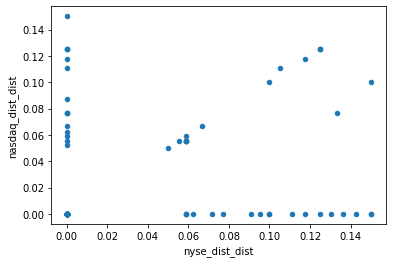

In [415]:
conflicts.plot.scatter('nyse_dist_dist', 'nasdaq_dist_dist')

<AxesSubplot:ylabel='Frequency'>

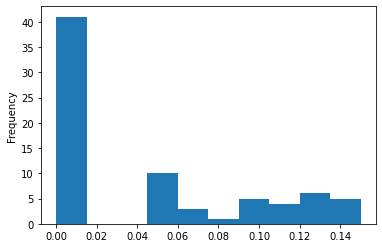

In [416]:
conflicts['nyse_dist_dist'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

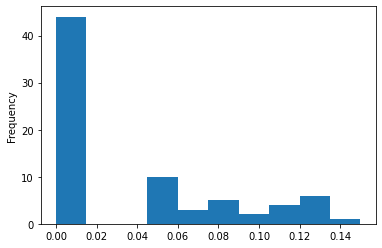

In [417]:
conflicts['nasdaq_dist_dist'].plot.hist()

In [419]:
conflicts[(conflicts['nasdaq_dist_dist'] == 0) & (conflicts['nyse_dist_dist'] == 0)]

,entity,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_results_temp,nyse_dist_dist,nasdaq_dist_dist
3464,acquisition corp,"[(LTN, union acquisition corp, 0.0)]","[(OPES, opes acquisition corp, 0.0)]","[(LTN, union acquisition corp, 0.0)]",0.0,0.0
7034,national holdings corp,"[(NBHC, national bank holdings corp, 0.0)]","[(NGHCN, national general holdings corp, 0.0),...","[(NBHC, national bank holdings corp, 0.0)]",0.0,0.0
8753,oaktree specialty lending corporation,"[(OSLE, oaktree specialty lending corp, 0.0)]","[(OCSL, oaktree specialty lending corp, 0.0)]","[(OSLE, oaktree specialty lending corp, 0.0)]",0.0,0.0
11836,about valley valley national bancorp,"[(VLY, valley national bancorp, 0.0)]","[(VLY, valley national bancorp, 0.0)]","[(VLY, valley national bancorp, 0.0)]",0.0,0.0
13628,weight watchers international inc,"[(WTW, weight watchers international inc, 0.0)]","[(WTW, weight watchers international inc, 0.0)]","[(WTW, weight watchers international inc, 0.0)]",0.0,0.0
15208,"weight watchers international, inc.","[(WTW, weight watchers international inc, 0.0)]","[(WTW, weight watchers international inc, 0.0)]","[(WTW, weight watchers international inc, 0.0)]",0.0,0.0
15994,thl credit inc,"[(TCRZ, thl credit inc, 0.0)]","[(TCRD, thl credit inc, 0.0)]","[(TCRZ, thl credit inc, 0.0)]",0.0,0.0
22449,international,"[(CAI, cai international, 0.0)]","[(ATNI, atn international, 0.0), (CRAI, cra in...","[(CAI, cai international, 0.0)]",0.0,0.0
22876,kcap financial inc,"[(KAP, kcap financial inc, 0.0)]","[(KCAP, kcap financial, 0.0)]","[(KAP, kcap financial inc, 0.0)]",0.0,0.0
23637,technologies inc,"[(ARLO, arlo technologies inc, 0.0), (BWXT, bw...","[(SIGA, siga technologies inc, 0.0), (USAT, us...","[(ARLO, arlo technologies inc, 0.0), (BWXT, bw...",0.0,0.0


In [420]:
conflicts.shape

(75, 6)

In [422]:
conflicts[(conflicts['nasdaq_dist_dist'] > 0) & (conflicts['nyse_dist_dist'] > 0)]

,entity,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_results_temp,nyse_dist_dist,nasdaq_dist_dist
3296,msb financial corp,"[(FBK, fb financial corp, 0.058823529411764705)]","[(CCNE, cnb financial corp, 0.1111111111111111...","[(FBK, fb financial corp, 0.058823529411764705)]",0.058824,0.055556
8881,ca technologies,"[(TTI, tetra technologies, 0.06666666666666667)]","[(ZBRA, zebra technologies, 0.06666666666666667)]","[(TTI, tetra technologies, 0.06666666666666667)]",0.066667,0.066667
13769,gm international,"[(CAI, cai international, 0.125)]","[(ATNI, atn international, 0.125), (CRAI, cra ...","[(CAI, cai international, 0.125)]",0.125000,0.125000
15791,cbt financial corp,"[(FBK, fb financial corp, 0.058823529411764705)]","[(MBTF, mbt financial corp, 0.05555555555555555)]","[(FBK, fb financial corp, 0.058823529411764705)]",0.058824,0.055556
18161,msb financial corp.,"[(FBK, fb financial corp, 0.058823529411764705)]","[(CCNE, cnb financial corp, 0.1111111111111111...","[(FBK, fb financial corp, 0.058823529411764705)]",0.058824,0.055556
20420,ci financial corp,"[(CNA, cna financial corp, 0.05882352941176470...","[(BOKF, bok financial corp, 0.1176470588235294...","[(CNA, cna financial corp, 0.05882352941176470...",0.058824,0.058824
24051,uqm technologies inc,"[(BWXT, bwx technologies inc, 0.15)]","[(USAT, usa technologies inc, 0.1)]","[(BWXT, bwx technologies inc, 0.15)]",0.150000,0.100000
24946,mdc holdings inc,"[(AAC, aac holdings inc, 0.125), (GNC, gnc hol...","[(ICCH, icc holdings inc, 0.125)]","[(AAC, aac holdings inc, 0.125), (GNC, gnc hol...",0.125000,0.125000
25056,dnb financial corp,"[(FBK, fb financial corp, 0.058823529411764705)]","[(CCNE, cnb financial corp, 0.0555555555555555...","[(FBK, fb financial corp, 0.058823529411764705)]",0.058824,0.055556
25904,bmo financial group,"[(CNO, cno financial group, 0.10526315789473684)]","[(SBFG, sb financial group, 0.1111111111111111)]","[(CNO, cno financial group, 0.10526315789473684)]",0.105263,0.111111


In [423]:
df

,entity,ngram_nyse_results,ngram_nasdaq_results,ngram_nyse_results_temp,nyse_dist_dist,nasdaq_dist_dist
7,fate therapeutics inc,[],"[(FATE, fate therapeutics, 0.0), (GTHX, g1 the...",[],NaN,0.0
19,louisiana-pacific,"[(LPX, louisiana-pacific corp, 0.0)]",[],"[(LPX, louisiana-pacific corp, 0.0)]",0.0000,NaN
20,"national retail properties, inc","[(NNN, national retail properties, 0.0)]",[],"[(NNN, national retail properties, 0.0)]",0.0000,NaN
27,chaparral energy inc,"[(CHAP, chaparral energy inc, 0.0)]",[],"[(CHAP, chaparral energy inc, 0.0)]",0.0000,NaN
50,chembio diagnostics,[],"[(CEMI, chembio diagnostics, 0.0)]",[],NaN,0.0
...,...,...,...,...,...,...
51763,alliant energy corporation,"[(LNT, alliant energy corp, 0.0)]",[],"[(LNT, alliant energy corp, 0.0)]",0.0000,NaN
51768,green brick partners,[],"[(GRBK, green brick partners, 0.0)]",[],NaN,0.0
51784,mb financial inc,"[(MFA, mfa financial inc, 0.0625), (MFO, mfa f...","[(HMNF, hmn financial inc, 0.0625), (MBFI, mb ...","[(MFA, mfa financial inc, 0.0625), (MFO, mfa f...",0.0625,0.0
51789,insignia systems inc,[],"[(ISIG, insignia systems, 0.0)]",[],NaN,0.0


In [425]:
df = df.drop(columns = ['ngram_nyse_results_temp','nyse_dist_dist','nasdaq_dist_dist'])
df

,entity,ngram_nyse_results,ngram_nasdaq_results
7,fate therapeutics inc,[],"[(FATE, fate therapeutics, 0.0), (GTHX, g1 the..."
19,louisiana-pacific,"[(LPX, louisiana-pacific corp, 0.0)]",[]
20,"national retail properties, inc","[(NNN, national retail properties, 0.0)]",[]
27,chaparral energy inc,"[(CHAP, chaparral energy inc, 0.0)]",[]
50,chembio diagnostics,[],"[(CEMI, chembio diagnostics, 0.0)]"
...,...,...,...
51763,alliant energy corporation,"[(LNT, alliant energy corp, 0.0)]",[]
51768,green brick partners,[],"[(GRBK, green brick partners, 0.0)]"
51784,mb financial inc,"[(MFA, mfa financial inc, 0.0625), (MFO, mfa f...","[(HMNF, hmn financial inc, 0.0625), (MBFI, mb ..."
51789,insignia systems inc,[],"[(ISIG, insignia systems, 0.0)]"


In [471]:
import operator
def process_resulting_labels(row):
    nyse_res = row.loc['ngram_nyse_results']
    nasdaq_res = row.loc['ngram_nasdaq_results']
    sorted_nyse_res = sorted(nyse_res, key=operator.itemgetter(2))
    sorted_nasdaq_res = sorted(nasdaq_res, key=operator.itemgetter(2))
    nyse_empty = len(nyse_res) == 0
    nasdaq_empty = len(nasdaq_res) == 0
    if nyse_empty:
        row['nyse_label'] = None
        row['nasdaq_label'] = sorted_nasdaq_res[0]
    elif nasdaq_empty:
        row['nyse_label'] = sorted_nyse_res[0]
        row['nasdaq_label'] = None
    else:
        # when both are empty shouldnt occur, because those records are excluded
        nyse_min = sorted_nyse_res[0]
        nasdaq_min = sorted_nasdaq_res[0]
        nyse_min_zero = nyse_min[2] == 0
        nasdaq_min_zero = nasdaq_min[2] == 0
        if not (nasdaq_min_zero ^ nyse_min_zero):
            entity_1st_word = row.loc['entity'].split()[0]
            print(f'entity_1st_word: {entity_1st_word}')
            nyse_1st_word = nyse_min[1].strip().split()[0]
            print(f'nyse_1st_word: {nyse_1st_word}')
            nasdaq_1st_word = nasdaq_min[1].strip().split()[0]
            print(f'nasdaq_1st_word: {nasdaq_1st_word}')
            if entity_1st_word == nyse_1st_word:
                row['nyse_label'] = nyse_min
            if entity_1st_word == nasdaq_1st_word:
                row['nasdaq_label'] = nasdaq_min
        elif nyse_min_zero:
            row['nyse_label'] = nyse_min
        elif nasdaq_min_zero:
            row['nasdaq_label'] = nasdaq_min
    return row
df

,entity,nasdaq_label,ngram_nasdaq_results,ngram_nyse_results,nyse_label
7,fate therapeutics inc,"(FATE, fate therapeutics, 0.0)","[(FATE, fate therapeutics, 0.0), (GTHX, g1 the...",[],None
19,louisiana-pacific,None,[],"[(LPX, louisiana-pacific corp, 0.0)]","(LPX, louisiana-pacific corp, 0.0)"
20,"national retail properties, inc",None,[],"[(NNN, national retail properties, 0.0)]","(NNN, national retail properties, 0.0)"
27,chaparral energy inc,None,[],"[(CHAP, chaparral energy inc, 0.0)]","(CHAP, chaparral energy inc, 0.0)"
50,chembio diagnostics,"(CEMI, chembio diagnostics, 0.0)","[(CEMI, chembio diagnostics, 0.0)]",[],None
...,...,...,...,...,...
51763,alliant energy corporation,None,[],"[(LNT, alliant energy corp, 0.0)]","(LNT, alliant energy corp, 0.0)"
51768,green brick partners,"(GRBK, green brick partners, 0.0)","[(GRBK, green brick partners, 0.0)]",[],None
51784,mb financial inc,"(MBFI, mb financial inc, 0.0)","[(HMNF, hmn financial inc, 0.0625), (MBFI, mb ...","[(MFA, mfa financial inc, 0.0625), (MFO, mfa f...",NaN
51789,insignia systems inc,"(ISIG, insignia systems, 0.0)","[(ISIG, insignia systems, 0.0)]",[],None


In [472]:
df = df.apply(process_resulting_labels, axis=1)
df

entity_1st_word: msb
nyse_1st_word: fb
nasdaq_1st_word: mvb
entity_1st_word: acquisition
nyse_1st_word: union
nasdaq_1st_word: opes
entity_1st_word: national
nyse_1st_word: national
nasdaq_1st_word: national
entity_1st_word: oaktree
nyse_1st_word: oaktree
nasdaq_1st_word: oaktree
entity_1st_word: ca
nyse_1st_word: tetra
nasdaq_1st_word: zebra
entity_1st_word: about
nyse_1st_word: valley
nasdaq_1st_word: valley
entity_1st_word: weight
nyse_1st_word: weight
nasdaq_1st_word: weight
entity_1st_word: gm
nyse_1st_word: cai
nasdaq_1st_word: atn
entity_1st_word: weight
nyse_1st_word: weight
nasdaq_1st_word: weight
entity_1st_word: cbt
nyse_1st_word: fb
nasdaq_1st_word: mbt
entity_1st_word: thl
nyse_1st_word: thl
nasdaq_1st_word: thl
entity_1st_word: msb
nyse_1st_word: fb
nasdaq_1st_word: mvb
entity_1st_word: ci
nyse_1st_word: cna
nasdaq_1st_word: cnb
entity_1st_word: international
nyse_1st_word: cai
nasdaq_1st_word: atn
entity_1st_word: kcap
nyse_1st_word: kcap
nasdaq_1st_word: kcap
entity_1st

,entity,nasdaq_label,ngram_nasdaq_results,ngram_nyse_results,nyse_label
7,fate therapeutics inc,"(FATE, fate therapeutics, 0.0)","[(FATE, fate therapeutics, 0.0), (GTHX, g1 the...",[],None
19,louisiana-pacific,None,[],"[(LPX, louisiana-pacific corp, 0.0)]","(LPX, louisiana-pacific corp, 0.0)"
20,"national retail properties, inc",None,[],"[(NNN, national retail properties, 0.0)]","(NNN, national retail properties, 0.0)"
27,chaparral energy inc,None,[],"[(CHAP, chaparral energy inc, 0.0)]","(CHAP, chaparral energy inc, 0.0)"
50,chembio diagnostics,"(CEMI, chembio diagnostics, 0.0)","[(CEMI, chembio diagnostics, 0.0)]",[],None
...,...,...,...,...,...
51763,alliant energy corporation,None,[],"[(LNT, alliant energy corp, 0.0)]","(LNT, alliant energy corp, 0.0)"
51768,green brick partners,"(GRBK, green brick partners, 0.0)","[(GRBK, green brick partners, 0.0)]",[],None
51784,mb financial inc,"(MBFI, mb financial inc, 0.0)","[(HMNF, hmn financial inc, 0.0625), (MBFI, mb ...","[(MFA, mfa financial inc, 0.0625), (MFO, mfa f...",NaN
51789,insignia systems inc,"(ISIG, insignia systems, 0.0)","[(ISIG, insignia systems, 0.0)]",[],None


In [476]:
df[(df['nasdaq_label'].isna()) & (df['nyse_label'].isna())]


,entity,nasdaq_label,ngram_nasdaq_results,ngram_nyse_results,nyse_label
3296,msb financial corp,NaN,"[(CCNE, cnb financial corp, 0.1111111111111111...","[(FBK, fb financial corp, 0.058823529411764705)]",NaN
8881,ca technologies,NaN,"[(ZBRA, zebra technologies, 0.06666666666666667)]","[(TTI, tetra technologies, 0.06666666666666667)]",NaN
13769,gm international,NaN,"[(ATNI, atn international, 0.125), (CRAI, cra ...","[(CAI, cai international, 0.125)]",NaN
15791,cbt financial corp,NaN,"[(MBTF, mbt financial corp, 0.05555555555555555)]","[(FBK, fb financial corp, 0.058823529411764705)]",NaN
18161,msb financial corp.,NaN,"[(CCNE, cnb financial corp, 0.1111111111111111...","[(FBK, fb financial corp, 0.058823529411764705)]",NaN
20420,ci financial corp,NaN,"[(BOKF, bok financial corp, 0.1176470588235294...","[(CNA, cna financial corp, 0.05882352941176470...",NaN
24051,uqm technologies inc,NaN,"[(USAT, usa technologies inc, 0.1)]","[(BWXT, bwx technologies inc, 0.15)]",NaN
24946,mdc holdings inc,NaN,"[(ICCH, icc holdings inc, 0.125)]","[(AAC, aac holdings inc, 0.125), (GNC, gnc hol...",NaN
25056,dnb financial corp,NaN,"[(CCNE, cnb financial corp, 0.0555555555555555...","[(FBK, fb financial corp, 0.058823529411764705)]",NaN
25904,bmo financial group,NaN,"[(SBFG, sb financial group, 0.1111111111111111)]","[(CNO, cno financial group, 0.10526315789473684)]",NaN


In [474]:
process_resulting_labels(df.loc[45178])

entity_1st_word: valley
nyse_1st_word: valley
nasdaq_1st_word: valley


entity                                    valley national bank
nasdaq_label              (VLY, valley national bancorp, 0.05)
ngram_nasdaq_results    [(VLY, valley national bancorp, 0.05)]
ngram_nyse_results      [(VLY, valley national bancorp, 0.05)]
nyse_label                (VLY, valley national bancorp, 0.05)
Name: 45178, dtype: object

In [477]:
df = df[(df['nasdaq_label'].notna()) | (df['nyse_label'].notna())]
df

,entity,nasdaq_label,ngram_nasdaq_results,ngram_nyse_results,nyse_label
7,fate therapeutics inc,"(FATE, fate therapeutics, 0.0)","[(FATE, fate therapeutics, 0.0), (GTHX, g1 the...",[],None
19,louisiana-pacific,None,[],"[(LPX, louisiana-pacific corp, 0.0)]","(LPX, louisiana-pacific corp, 0.0)"
20,"national retail properties, inc",None,[],"[(NNN, national retail properties, 0.0)]","(NNN, national retail properties, 0.0)"
27,chaparral energy inc,None,[],"[(CHAP, chaparral energy inc, 0.0)]","(CHAP, chaparral energy inc, 0.0)"
50,chembio diagnostics,"(CEMI, chembio diagnostics, 0.0)","[(CEMI, chembio diagnostics, 0.0)]",[],None
...,...,...,...,...,...
51763,alliant energy corporation,None,[],"[(LNT, alliant energy corp, 0.0)]","(LNT, alliant energy corp, 0.0)"
51768,green brick partners,"(GRBK, green brick partners, 0.0)","[(GRBK, green brick partners, 0.0)]",[],None
51784,mb financial inc,"(MBFI, mb financial inc, 0.0)","[(HMNF, hmn financial inc, 0.0625), (MBFI, mb ...","[(MFA, mfa financial inc, 0.0625), (MFO, mfa f...",NaN
51789,insignia systems inc,"(ISIG, insignia systems, 0.0)","[(ISIG, insignia systems, 0.0)]",[],None


In [478]:
df = df.drop(columns=['ngram_nasdaq_results','ngram_nyse_results'])
df

,entity,nasdaq_label,nyse_label
7,fate therapeutics inc,"(FATE, fate therapeutics, 0.0)",None
19,louisiana-pacific,None,"(LPX, louisiana-pacific corp, 0.0)"
20,"national retail properties, inc",None,"(NNN, national retail properties, 0.0)"
27,chaparral energy inc,None,"(CHAP, chaparral energy inc, 0.0)"
50,chembio diagnostics,"(CEMI, chembio diagnostics, 0.0)",None
...,...,...,...
51763,alliant energy corporation,None,"(LNT, alliant energy corp, 0.0)"
51768,green brick partners,"(GRBK, green brick partners, 0.0)",None
51784,mb financial inc,"(MBFI, mb financial inc, 0.0)",NaN
51789,insignia systems inc,"(ISIG, insignia systems, 0.0)",None


In [479]:
news_files

['/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-05.json',
 '/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-04.json',
 '/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-03.json',
 '/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-02.json',
 '/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-01.json']

In [480]:
input_files = [ f for f in news_files if not f.endswith('-05.json')]
input_files

['/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-04.json',
 '/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-03.json',
 '/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-02.json',
 '/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-01.json']

# Algorithm 1
Extracts all detected entites from news dataset

Used Functions (from above, in case I need to extract into script):
* remove_published

Note: should be executed after preprocessing initial data form us-financial news
see the other notebook: "Data prep - news with orgs"

### Datasets used
* https://www.kaggle.com/jeet2016/us-financial-news-articles

### Dependencies
* os (getcwd, listdir, path)
* pandas

In [579]:
max_article_entities = 7
custom_blacklist = ['thomson reuters']

# COPIED FROM CELLS FROM ABOVE
#cwd = getcwd()
#data_news_dir = path.join(cwd, '../data/prepared')
#news_files = list(map(lambda entry: path.join(data_news_dir, entry),listdir(data_news_dir)))
#input_files = [ f for f in news_files if not f.endswith('-05.json')]

# Hardcoded because of bug found later on

def remove_published_fix(row):
    print(row.loc['entities.organizations'])
    row.loc['entities.organizations'] = list(
        filter(
            lambda d: d != row.loc['entities_blacklist'] and (d not in custom_blacklist),
            row.loc['entities.organizations']
        )
    )
    return row
def sanitize_entity(entity_rec):
    return entity_rec['name'].strip()

# Note original algorithm stopped working, therefore needed refactor

def get_entities_from_file(
    fp,
    article_entity_threshold=max_article_entities
):
    print(f'Processing file "{fp}"')
    df = pd.read_json(fp)
    df['entities_blacklist'] = df['thread.site_full'].apply(lambda entry: entry.split('.')[-2])
    #df['entities.organizations'] = df['entities.organizations'].apply(
    #    lambda entities: list(map(sanitize_entity, entities))
    #)
    df = df.apply(remove_published_fix, axis=1)
    df = df.drop(columns=['thread.site_full','entities_blacklist'])
    df['mentioned_entities'] = df['entities.organizations'].apply(lambda arr: len(arr))
    df = df[df['mentioned_entities'] <= article_entity_threshold]
    return df['entities.organizations']
#kb = pd.Series(list(set([ e for file in input_files for row in get_entities_from_file(file) for e in row ])))

def get_entities_from_file2(
    fp,
    article_entity_threshold=max_article_entities
):
    print(f'Processing file "{fp}"')
    df = pd.read_json(fp)
    counter = 0
    for index,row in df.iterrows():
        if index % 10000 == 0:
            print(f'Processed {index} records')
        blacklist = row.loc['thread.site_full'].split('.')[-2]
        entities = row.loc['entities.organizations']
        if len(entities) > article_entity_threshold:
            continue
        for entity in entities:
            if entity != blacklist and entity not in custom_blacklist:
                yield entity['name']

kb = pd.Series(list(set([ e for file in input_files for e in get_entities_from_file2(file) ])))
kb

Processing file "/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-04.json"
Processed 0 records
Processed 10000 records
Processed 20000 records
Processed 30000 records
Processed 40000 records
Processed 50000 records
Processed 60000 records
Processing file "/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-03.json"
Processed 0 records
Processed 10000 records
Processed 20000 records
Processed 30000 records
Processed 40000 records
Processed 50000 records
Processing file "/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-02.json"
Processed 0 records
Processed 10000 records
Processed 20000 records
Processed 30000 records
Processed 40000 records
Processed 50000 records
Processed 60000 records
Processing file "/Users/melkos01/Documents/aitalents-investoid/notebooks/../data/prepared/2018-01.json"
Processed 0 records
Processed 10000 records
Processed 20000 records
Processed 30000 records
Processed 40000 records


0               supreme court questions breadth of police
1                               homestead capital usa llc
2                                     eli lilly & company
3                       mer telemanagement solutions ltd.
4         min read    cognizant technology solutions corp
                               ...                       
144341                                          frontline
144342                       foreign correspondents’ club
144343                   sc lowy acquires remaining stake
144344                    brief-platinum group metals ltd
144345                         e.t. u.s. & canada dial-in
Length: 144346, dtype: object

In [580]:
kb

0               supreme court questions breadth of police
1                               homestead capital usa llc
2                                     eli lilly & company
3                       mer telemanagement solutions ltd.
4         min read    cognizant technology solutions corp
                               ...                       
144341                                          frontline
144342                       foreign correspondents’ club
144343                   sc lowy acquires remaining stake
144344                    brief-platinum group metals ltd
144345                         e.t. u.s. & canada dial-in
Length: 144346, dtype: object

# Algorithm 2

Note: should be executed after both preprocessing initial data & Algorithm 1

Used functions:
* convert_list_of_tuples_to_series
* load_stock_symbols
* calculate_ngrams
* call_counter
* calculate_normalized_levenshtein

### Datasets used
* https://www.kaggle.com/qks1lver/nasdaq-and-nyse-stocks-histories/
* https://www.kaggle.com/jeet2016/us-financial-news-articles

### Dependencies
* nltk
* pandas
* os

In [581]:
default_jaccard_distance_threshold = 0.3

def sanitize_stock_series(s):
    return pd.DataFrame(s.str.lower()).rename(columns={1: 'entity'})
def create_ngrams(df,source_column,q=3):
    df[f'{source_column}_ngrams'] = df[source_column].apply(lambda entity: set(nltk.ngrams(entity, n=3)))
    return df
def get_stock_entity(stock_market_df, stock_symbol):
    return stock_market_df.loc[stock_symbol, 'entity'].values.tolist()

# Note copied from above with slight parameter adjustments
@call_counter
def calculate_results_for_ngrams(input_ngrams, stock_market_df, ngram_column, threshold):
    stock_market_df['temp_results'] = stock_market_df[f'{ngram_column}_ngrams'].apply(
        lambda ngrams: nltk.jaccard_distance(ngrams, input_ngrams)
    )
    return stock_market_df[stock_market_df['temp_results'] < threshold].index.tolist()

def create_lookup_records(stock_symbols, stock_market_df, entity):
    related_entities = stock_market_df.loc[stock_symbols]
    return [
        (stock_symbol, related_entity, calculate_normalized_levenshtein(entity,related_entity))
        for stock_symbol,related_entity in zip(related_entities.index, related_entities['entity'])
    ]

def calculate_ngrams(
    df,
    name,
    stock_market_df,
    threshold = default_jaccard_distance_threshold
):
    result_col_name = f'ngram_{name}_results'
    df[result_col_name] = df['entity_ngrams'].apply(
        lambda ngram: calculate_results_for_ngrams(ngram, stock_market_df, 'entity', threshold)
    )
    stock_market_df = stock_market_df.drop(columns=['temp_results'])
    return df

stocks_path = path.join(cwd, '../data/stock-data')
nasdaq_df, nyse_df = tuple(
    map(lambda source: sanitize_stock_series(convert_list_of_tuples_to_series([
        entry
        for entry in source
        if entry[0] not in excluded_symbols 
        and path.isfile(path.join(stocks_path, f'full_history/{entry[0]}.csv'))
    ])), load_stock_symbols())
)
stock_market_labels_dict = {
    'nyse': nyse_df,
    'nasdaq': nasdaq_df
}
def add_stock_symbol_labels(df, stock_market_labels):
    print(f'Generating ngrams')
    df = create_ngrams(df, 'entity')
    for stock_market_name, stock_market_df in stock_market_labels.items():
        print(f'Generating ngrams for "{stock_market_name}"')
        stock_market_df = create_ngrams(stock_market_df, 'entity')
        stock_market_labels[stock_market_name] = stock_market_df
        print(f'Calculating similarities for "{stock_market_name}"')
        df = calculate_ngrams(df, stock_market_name, stock_market_df, 0.3)
    print('Dropping entities without similar results')
    print(f'Before: {df.shape[0]} records')
    df = df[df.apply(
        lambda row: any(map(
            lambda key: len(row.loc[f'ngram_{key}_results']) > 0,
            stock_market_labels.keys()
        )), axis=1
    )]
    print(f'After: {df.shape[0]} records')
    for stock_market_name, stock_market_df in stock_market_labels.items():
        print(f'Joining with table "{stock_market_name}"')
        df[f'ngram_{stock_market_name}_results'] = df.apply(
            lambda row: create_lookup_records(
                row.loc[f'ngram_{stock_market_name}_results'],
                stock_market_df,
                row.loc['entity']
            ),
            axis=1
        )
    print('Chossing resulting labels according to single metric')
    df = df.apply(process_resulting_labels, axis=1)
    return df
knowledge_base = pd.DataFrame(kb.str.lower()).rename(columns={0: 'entity'})
knowledge_base = add_stock_symbol_labels(knowledge_base, stock_market_labels_dict)
knowledge_base

Generating ngrams
Generating ngrams for "nyse"
Calculating similarities for "nyse"
calls: 1000
calls: 2000
calls: 3000
calls: 4000
calls: 5000
calls: 6000
calls: 7000
calls: 8000
calls: 9000
calls: 10000
calls: 11000
calls: 12000
calls: 13000
calls: 14000
calls: 15000
calls: 16000
calls: 17000
calls: 18000
calls: 19000
calls: 20000
calls: 21000
calls: 22000
calls: 23000
calls: 24000
calls: 25000
calls: 26000
calls: 27000
calls: 28000
calls: 29000
calls: 30000
calls: 31000
calls: 32000
calls: 33000
calls: 34000
calls: 35000
calls: 36000
calls: 37000
calls: 38000
calls: 39000
calls: 40000
calls: 41000
calls: 42000
calls: 43000
calls: 44000
calls: 45000
calls: 46000
calls: 47000
calls: 48000
calls: 49000
calls: 50000
calls: 51000
calls: 52000
calls: 53000
calls: 54000
calls: 55000
calls: 56000
calls: 57000
calls: 58000
calls: 59000
calls: 60000
calls: 61000
calls: 62000
calls: 63000
calls: 64000
calls: 65000
calls: 66000
calls: 67000
calls: 68000
calls: 69000
calls: 70000
calls: 71000
cal

<ipython-input-581-2e49464a0bde>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'ngram_{stock_market_name}_results'] = df.apply(


Joining with table "nasdaq"
Chossing resulting labels according to single metric
entity_1st_word: msb
nyse_1st_word: fb
nasdaq_1st_word: mvb
entity_1st_word: ia
nyse_1st_word: cna
nasdaq_1st_word: bok
entity_1st_word: national
nyse_1st_word: national
nasdaq_1st_word: national
entity_1st_word: oaktree
nyse_1st_word: oaktree
nasdaq_1st_word: oaktree
entity_1st_word: ca
nyse_1st_word: tetra
nasdaq_1st_word: zebra
entity_1st_word: carolina
nyse_1st_word: cna
nasdaq_1st_word: carolina
entity_1st_word: community
nyse_1st_word: community
nasdaq_1st_word: community
entity_1st_word: about
nyse_1st_word: weight
nasdaq_1st_word: weight
entity_1st_word: about
nyse_1st_word: valley
nasdaq_1st_word: valley
entity_1st_word: iran
nyse_1st_word: titan
nasdaq_1st_word: atn
entity_1st_word: apollo
nyse_1st_word: apollo
nasdaq_1st_word: apollo
entity_1st_word: weight
nyse_1st_word: weight
nasdaq_1st_word: weight
entity_1st_word: zions
nyse_1st_word: zion
nasdaq_1st_word: zions
entity_1st_word: oaktree
nys

,entity,entity_ngrams,nasdaq_label,ngram_nasdaq_results,ngram_nyse_results,nyse_label
3,mer telemanagement solutions ltd.,"{(g, e, m), (e, r, ), (o, l, u), (e, l, e), (...","(MTSL, mer telemanagement solutions ltd, 0.0)","[(MTSL, mer telemanagement solutions ltd, 0.0)]",[],None
27,"national retail properties, inc","{(a, i, l), (r, e, t), (,, , i), (o, n, a), (...",None,[],"[(NNN, national retail properties, 0.0)]","(NNN, national retail properties, 0.0)"
31,louisiana-pacific,"{(s, i, a), (i, f, i), (f, i, c), (a, n, a), (...",None,[],"[(LPX, louisiana-pacific corp, 0.0)]","(LPX, louisiana-pacific corp, 0.0)"
35,qualys inc,"{(u, a, l), ( , i, n), (q, u, a), (y, s, ), (...","(QLYS, qualys inc, 0.0)","[(QLYS, qualys inc, 0.0)]",[],None
36,chaparral energy inc,"{(r, g, y), (n, e, r), (e, r, g), ( , e, n), (...",None,[],"[(CHAP, chaparral energy inc, 0.0)]","(CHAP, chaparral energy inc, 0.0)"
...,...,...,...,...,...,...
144167,oclaro inc.,"{(o, , i), (c, l, a), ( , i, n), (n, c, .), (...","(OCLR, oclaro inc, 0.0)","[(OCLR, oclaro inc, 0.0)]",[],None
144189,proteon therapeutics inc,"{(o, n, ), (p, e, u), (i, c, s), (r, o, t), (...","(NTGN, neon therapeutics inc, 0.04761904761904...","[(NTGN, neon therapeutics inc, 0.0476190476190...",[],None
144222,cfm international inc.,"{(m, , i), (n, c, .), (o, n, a), (n, t, e), (...",None,[],"[(HIL, hill international inc., 0.136363636363...","(RPM, rpm international inc, 0.09523809523809523)"
144227,relx plc,"{(l, x, ), (p, l, c), (e, l, x), (r, e, l), (...",None,[],"[(RELX, relx plc, 0.0)]","(RELX, relx plc, 0.0)"


In [582]:
output = knowledge_base[['entity','nasdaq_label','nyse_label']]
output.head()

,entity,nasdaq_label,nyse_label
3,mer telemanagement solutions ltd.,"(MTSL, mer telemanagement solutions ltd, 0.0)",None
27,"national retail properties, inc",None,"(NNN, national retail properties, 0.0)"
31,louisiana-pacific,None,"(LPX, louisiana-pacific corp, 0.0)"
35,qualys inc,"(QLYS, qualys inc, 0.0)",None
36,chaparral energy inc,None,"(CHAP, chaparral energy inc, 0.0)"


In [583]:
output.to_json(path.join(cwd,'../data/translation'))

,entity,nasdaq_label,nyse_label
5,mer telemanagement solutions ltd.,"(MTSL, mer telemanagement solutions ltd, 0.0)",None
28,"national retail properties, inc",None,"(NNN, national retail properties, 0.0)"
32,louisiana-pacific,None,"(LPX, louisiana-pacific corp, 0.0)"
37,qualys inc,"(QLYS, qualys inc, 0.0)",None
38,chaparral energy inc,None,"(CHAP, chaparral energy inc, 0.0)"
...,...,...,...
146550,oclaro inc.,"(OCLR, oclaro inc, 0.0)",None
146573,proteon therapeutics inc,"(NTGN, neon therapeutics inc, 0.04761904761904...",None
146607,cfm international inc.,None,"(RPM, rpm international inc, 0.09523809523809523)"
146612,relx plc,None,"(RELX, relx plc, 0.0)"


In [ ]:
outpu